In [42]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  

In [105]:
small_dataset = 'ml-latest-small'
large_dataset = 'ml-latest'

cleaned_small_dataset_dir = 'ml-latest-small-cleaned'

In [161]:
from enum import Enum
import os

class MovieLenseData(Enum):
    movie = 'movies.csv'
    links = 'links.csv'
    ratings = 'ratings.csv'
    tags = 'tags.csv'
    movie_info = 'movie_info.csv'
    cast = 'cast.csv'
    
    def read_csv(self, dataset_path):
        csv_path = os.path.join(dataset_path, self.value)
        return pd.read_csv(csv_path)
    def write_csv(self, dataset_path, df):
        file_name = os.path.join(dataset_path, self.value)
        df.to_csv(file_name)

# Cleaning Datasets

## Cleaning Movies

In [37]:
movies_df = MovieLenseData.movie.read_csv(small_dataset)

In [48]:
genre_mapping = {}
def split_and_populate_mapping(genres):
    genre_list = genres.split('|')
    for genre in genre_list:
        if genre not in genre_mapping and genre != '(no genres listed)':
            genre_mapping[genre] = len(genre_mapping)
movies_df['genres'].apply(split_and_populate_mapping)
genre_mapping

{'Adventure': 0,
 'Animation': 1,
 'Children': 2,
 'Comedy': 3,
 'Fantasy': 4,
 'Romance': 5,
 'Drama': 6,
 'Action': 7,
 'Crime': 8,
 'Thriller': 9,
 'Horror': 10,
 'Mystery': 11,
 'Sci-Fi': 12,
 'War': 13,
 'Musical': 14,
 'Documentary': 15,
 'IMAX': 16,
 'Western': 17,
 'Film-Noir': 18}

In [47]:
movies_df[movies_df['genres'] == '(no genres listed)']

,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


In [26]:
len(genre_mapping)

20

In [120]:
1 if 'a' in 'bal' else 0

1

In [132]:
def clean_movies(movies_df):
    cleaned_movies_df = movies_df.copy()
    genre_mapping = {}
    def split_and_populate_mapping(genres):
        genre_list = genres.split('|')
        for genre in genre_list:
            if genre not in genre_mapping and genre != '(no genres listed)':
                genre_mapping[genre] = len(genre_mapping)
    cleaned_movies_df['genres'].apply(split_and_populate_mapping)
    
    def vectorize_generes(genres):
        one_hot_genres_arr = np.zeros(len(genre_mapping))
        for genre in genres.split('|'):
            if genre in genre_mapping:
                one_hot_genres_arr[genre_mapping[genre]] = 1
        return one_hot_genres_arr
    cleaned_movies_df['genres_vectorized'] = cleaned_movies_df['genres'].apply(vectorize_generes)
    cleaned_movies_df['genres_list'] = cleaned_movies_df['genres'].str.split('|')
#     for genre in genre_mapping.keys():
#         cleaned_movies_df[genre] = cleaned_movies_df['genres'].apply(lambda genre_str: 1 if genre in genre_str else 0)
    
    return cleaned_movies_df

In [133]:
cleaned_movies_df = clean_movies(movies_df)
cleaned_movies_df

,movieId,title,genres,genres_vectorized,genres_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[Comedy]
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[Action, Animation]"


In [134]:
MovieLenseData.movie.write_csv(cleaned_small_dataset_dir, cleaned_movies_df)

In [131]:
genre_mapping

{'Adventure': 0,
 'Animation': 1,
 'Children': 2,
 'Comedy': 3,
 'Fantasy': 4,
 'Romance': 5,
 'Drama': 6,
 'Action': 7,
 'Crime': 8,
 'Thriller': 9,
 'Horror': 10,
 'Mystery': 11,
 'Sci-Fi': 12,
 'War': 13,
 'Musical': 14,
 'Documentary': 15,
 'IMAX': 16,
 'Western': 17,
 'Film-Noir': 18}

In [141]:
movies_by_genere_row = cleaned_movies_df.explode('genres_list')[['movieId', 'title', 'genres_list']]
movies_by_genere_row['genre'] = movies_by_genere_row['genres_list']
del movies_by_genere_row['genres_list']

In [142]:
movies_by_genere_row

,movieId,title,genre
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [143]:
movies_by_genere_row_csv = os.path.join(cleaned_small_dataset_dir, 'generes_for_movie_individual_rows.csv')
movies_by_genere_row.to_csv(movies_by_genere_row_csv)

## Cleaning Tags

In [112]:
tags_df = MovieLenseData.tags.read_csv(small_dataset)
tags_df

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [113]:
import re

def tokenize_tags(tags_df):
    new_tags_df = tags_df.copy()
    new_tags_df['replaced_col'] = new_tags_df['tag'].map(lambda tag: re.sub(r'\W+', ' ', tag))
    new_tags_df['replaced_col_lower'] = new_tags_df['replaced_col'].str.lower()
    new_tags_df['words_list'] = new_tags_df['replaced_col_lower'].str.split()
    del new_tags_df['replaced_col']
    del new_tags_df['replaced_col_lower']
    
    return new_tags_df
    


In [150]:
tokenized_tags_df = tokenize_tags(tags_df)
tokenized_tags_df

,userId,movieId,tag,timestamp,words_list
0,2,60756,funny,1445714994,[funny]
1,2,60756,Highly quotable,1445714996,"[highly, quotable]"
2,2,60756,will ferrell,1445714992,"[will, ferrell]"
3,2,89774,Boxing story,1445715207,"[boxing, story]"
4,2,89774,MMA,1445715200,[mma]
...,...,...,...,...,...
3678,606,7382,for katie,1171234019,"[for, katie]"
3679,606,7936,austere,1173392334,[austere]
3680,610,3265,gun fu,1493843984,"[gun, fu]"
3681,610,3265,heroic bloodshed,1493843978,"[heroic, bloodshed]"


In [117]:
MovieLenseData.tags.write_csv(cleaned_small_dataset_dir, tokenized_tags_df)

In [76]:
tags_df['replaced_col_lower'] = tags_df['replaced_col'].str.lower()

In [79]:
tags_df['words_list'] = tags_df['replaced_col_lower'].str.split()

In [90]:
words = tags_df['words_list'].explode('words_list')

/Users/mark/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='words_list'>

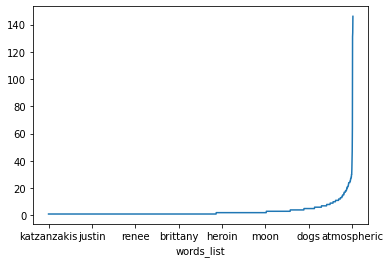

In [97]:
words.groupby(words).count().sort_values().plot(x='words_list')

In [104]:
words.groupby(words).count().sort_values(ascending=False)[:100]

words_list
in           146
netflix      134
queue        131
comedy        64
dark          47
            ... 
adventure     11
fantasy       11
adultery      11
will          11
film          11
Name: words_list, Length: 100, dtype: int64

In [111]:
word_counts = words.groupby(words).count().sort_values(ascending=False)
all_words_csv = os.path.join(cleaned_small_dataset_dir, 'distinct_tag_counts.csv')
word_counts.to_csv(all_words_csv)

## Join Tags to Raitings

In [149]:
ratings_df = MovieLenseData.ratings.read_csv(small_dataset)
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [157]:
ratings_df.groupby('userid').count()

KeyError: 'userid'

In [154]:
tags_and_ratings_df = pd.merge(tokenized_tags_df, ratings_df, on=['userId', 'movieId'], how='outer', suffixes=('_tags', '_ratings'))

In [155]:
# TODO: do not use these!!
tags_and_ratings_csv = os.path.join(cleaned_small_dataset_dir, 'tags_and_ratings.csv')
tags_and_ratings_df.to_csv(tags_and_ratings_csv)

In [156]:
tags_and_ratings_df

,userId,movieId,tag,timestamp_tags,words_list,rating,timestamp_ratings
0,2,60756,funny,1.445715e+09,[funny],5.0,1.445715e+09
1,2,60756,Highly quotable,1.445715e+09,"[highly, quotable]",5.0,1.445715e+09
2,2,60756,will ferrell,1.445715e+09,"[will, ferrell]",5.0,1.445715e+09
3,2,89774,Boxing story,1.445715e+09,"[boxing, story]",5.0,1.445715e+09
4,2,89774,MMA,1.445715e+09,[mma],5.0,1.445715e+09
...,...,...,...,...,...,...,...
102879,610,166528,NaN,NaN,NaN,4.0,1.493879e+09
102880,610,166534,NaN,NaN,NaN,4.0,1.493848e+09
102881,610,168250,NaN,NaN,NaN,5.0,1.494273e+09
102882,610,168252,NaN,NaN,NaN,5.0,1.493846e+09


## Trying to Learn Contributions from Actors

In [170]:
cast_df = MovieLenseData.cast.read_csv(cleaned_small_dataset_dir)

In [171]:
cast_df

,adult,gender,id,known_for_department,name,original_name,popularity,profile_path,cast_id,character,credit_id,order,tmdbId,movieId
0,False,2.0,31.0,Acting,Tom Hanks,Tom Hanks,31.787,/xndWFsBlClOJFRdhSt4NBwiPq2o.jpg,14.0,Woody (voice),52fe4284c3a36847f8024f95,0.0,862.0,1.0
1,False,2.0,12898.0,Acting,Tim Allen,Tim Allen,6.733,/6qlDjidQSKNcJFHzTXh0gQS83ub.jpg,15.0,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,1.0,862.0,1.0
2,False,2.0,7167.0,Acting,Don Rickles,Don Rickles,2.322,/iJLQV4dcbTUgxlWJakjDldzlMXS.jpg,16.0,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2.0,862.0,1.0
3,False,2.0,12899.0,Acting,Jim Varney,Jim Varney,3.982,/yrhgPWGOc36GN0P9kuJ48sU4fVa.jpg,17.0,Slinky Dog (voice),52fe4284c3a36847f8024fa1,3.0,862.0,1.0
4,False,2.0,12900.0,Acting,Wallace Shawn,Wallace Shawn,5.282,/jviZU3Ae0vVKW6cYeEtjfxq2TWS.jpg,18.0,Rex (voice),52fe4284c3a36847f8024fa5,4.0,862.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266363,False,0.0,559446.0,Acting,Alex Thaler,Alex Thaler,0.600,NaN,1023.0,Background Actor (uncredited),52fe467b9251416c91055d9f,19.0,37891.0,193609.0
266364,False,1.0,6479.0,Production,Sharon Bialy,Sharon Bialy,2.489,/cgz8PwlI1iJHFEZZ6BguMUv6U4E.jpg,1024.0,NaN,52fe467b9251416c91055da3,20.0,37891.0,193609.0
266365,False,1.0,25830.0,Production,Debi Manwiller,Debi Manwiller,1.214,/2LGUnaXYCwPMjqWsBtDVajFZMm7.jpg,1025.0,NaN,52fe467b9251416c91055da7,21.0,37891.0,193609.0
266366,False,1.0,60056.0,Production,Mary Margiotta,Mary Margiotta,1.400,NaN,1026.0,NaN,52fe467b9251416c91055dab,22.0,37891.0,193609.0


In [172]:
cast_df.plot.bar()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fba008ee598> (for post_execute):


KeyboardInterrupt: 

In [164]:
from sklearn.preprocessing import OneHotEncoder

In [166]:
example = pd.DataFrame({'a': ['x', 'y', 'z']})

In [167]:
enc = OneHotEncoder()

In [ ]:

enc.fit(

In [168]:
movie_info_df = MovieLenseData.movie_info.read_csv(cleaned_small_dataset_dir)

In [169]:
movie_info_df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,tmdbId,movieId
0,False,/3Rfvhy1Nl6sSGJwyjb0QiZzZYlB.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",101.592,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Toy Story,False,7.9,13839,862.0,1.0
1,False,/6w31RRm2s2CK1r3xDLf12WgIaHa.jpg,"{'id': 495527, 'name': 'Jumanji Collection', '...",65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.sonypictures.com/movies/jumanji/,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,16.168,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,"[{'id': 559, 'logo_path': '/eC0bWHVjnjUducyA6Y...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Roll the dice and unleash the excitement!,Jumanji,False,7.2,8095,8844.0,2.0
2,False,/nh9gYaXHTNT9yylX10L9aGqFehy.jpg,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.271,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,"[{'id': 19464, 'logo_path': None, 'name': 'Lan...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,242,15602.0,3.0
3,False,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",9.377,/4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.4,90,31357.0,4.0
4,False,/1XUPR3Ki1fvZDCtetcepMoz7oqu.jpg,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,12.056,/rj4LBtwQ0uGrpBnCELr716Qo3mw.jpg,"[{'id': 9195, 'logo_path': '/ou5BUbtulr6tIt699...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-08,76578911,106,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,6.2,484,11862.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9626,False,/clFQR5zwzDrayMVVe7axo0YLFfh.jpg,"{'id': 511109, 'name': 'Kuroshithuji Collectio...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.kuroshitsuji-movie.com/,432131,tt5476944,ja,黒執事 Book of the Atlantic,"Ciel learns of a ""Aurora Society"", that is rum...",7.685,/4jU2Bdk1MB2OvP4BBvTJIPQc0BF.jpg,[],[],2017-01-21,0,100,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Black Butler: Book of the Atlantic,False,7.8,62,432131.0,193581.0
9627,False,/b0dP4lPgK8Dg0tQEPx6z73jRURA.jpg,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",http://ngnl.jp/,445030,tt5914996,ja,ノーゲーム・ノーライフ ゼロ,"In ancient Disboard, Riku is an angry, young w...",40.023,/cCBB6BGRj5nCTaEgogDtkHfjOLK.jpg,"[{'id': 3464, 'logo_path': '/9k0nr75nwnNeT2MHe...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2017-07-15,6000000,106